In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [4]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential() 

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same' ,input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Final/dataset/train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 3400 images belonging to 2 classes.


In [7]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Final/dataset/test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 600 images belonging to 2 classes.


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(training_set,epochs=20,batch_size=32,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
107/107 [==============================] - 705s 6s/step - loss: 0.7471 - accuracy: 0.7821 - val_loss: 0.0885 - val_accuracy: 0.9583
Epoch 2/20
107/107 [==============================] - 507s 5s/step - loss: 0.1428 - accuracy: 0.9571 - val_loss: 0.0135 - val_accuracy: 0.9967
Epoch 3/20
107/107 [==============================] - 504s 5s/step - loss: 0.1360 - accuracy: 0.9571 - val_loss: 0.0692 - val_accuracy: 0.9617
Epoch 4/20
107/107 [==============================] - 505s 5s/step - loss: 0.0986 - accuracy: 0.9724 - val_loss: 0.0146 - val_accuracy: 0.9983
Epoch 5/20
107/107 [==============================] - 509s 5s/step - loss: 0.0734 - accuracy: 0.9797 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/20
107/107 [==============================] - 508s 5s/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0084 - val_accuracy: 0.9983
Epoch 7/20
107/107 [==============================] - 510s 5s/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0016 - val_accuracy: 1.0000

In [10]:
from keras.models import load_model
model.save('Cuoiki.h5')
model_CNN = load_model('Cuoiki.h5')

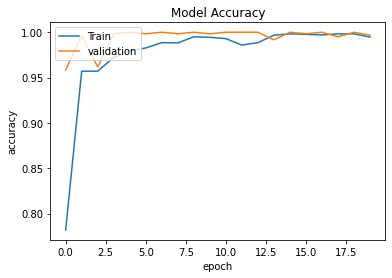

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [12]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01867879368364811
Train Accuracy 0.9941176176071167


Close eyes


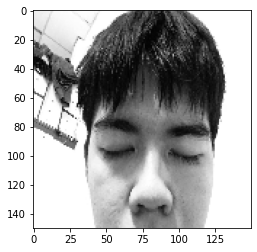

Open eyes


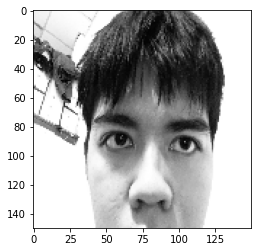

In [28]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
model_CNN = load_model('/content/gdrive/MyDrive/Colab Notebooks/Final/dataset1/Cuoiki.h5')
test="/content/gdrive/MyDrive/Colab Notebooks/Final/dataset1/val"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Close eyes'
  if round(result[0][1])==1:
    prediction='Open eyes'


  print(prediction)
  plt.show()